# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [128]:
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, label_binarize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt


penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [129]:
penguins = penguins.dropna()
X = penguins.drop("species", axis = 1)
y = penguins["species"]

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object))
    ],
  remainder = "passthrough")

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

[[126  11   9]
 [ 36  29   3]
 [  9   2 108]]


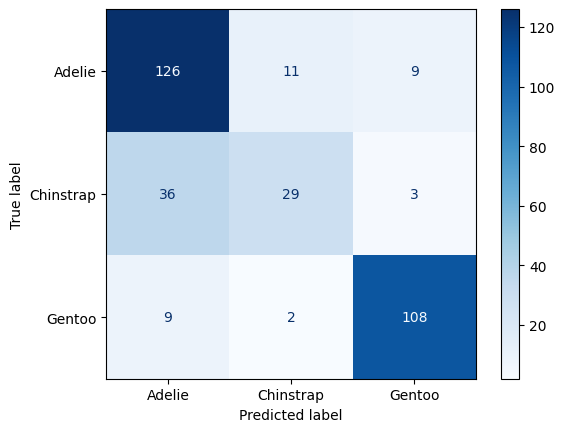

In [130]:
#K Nearest Neighbors
knn_pipeline1 = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier(n_neighbors=5))]
)

#Confusion Matrix
#Perform cross-validated predictions
y_pred_cv = cross_val_predict(knn_pipeline1, X, y, cv=5)

#Print confusion matrix and classification report
cm = confusion_matrix(y, y_pred_cv)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')

In [131]:
#Overall Accuracy
cv_accuracy = cross_val_score(knn_pipeline1, X, y, cv=5, scoring='accuracy').mean()
cv_accuracy

0.7902306648575306

In [132]:
#Precision, Recall, and F1 Score
report1 = classification_report(y, y_pred_cv, target_names=['Adelie', 'Chinstrap', 'Gentoo'])
print(report1)

              precision    recall  f1-score   support

      Adelie       0.74      0.86      0.79       146
   Chinstrap       0.69      0.43      0.53        68
      Gentoo       0.90      0.91      0.90       119

    accuracy                           0.79       333
   macro avg       0.78      0.73      0.74       333
weighted avg       0.79      0.79      0.78       333



In [133]:
#AUC Score

knn_pipeline1.fit(X, y)

# Binarize the true labels for multi-class AUC calculation
y_bin = label_binarize(y, classes=np.unique(y))

# Get predicted probabilities for each class
y_pred_prob = knn_pipeline1.predict_proba(X)

# Calculate and print the AUC for each species in one line per species
for i, species_name in enumerate(np.unique(y)):
    print(f"AUC score for {species_name}: {roc_auc_score(y_bin[:, i], y_pred_prob[:, i])}")


AUC score for Adelie: 0.954050985275804
AUC score for Chinstrap: 0.9468091009988902
AUC score for Gentoo: 0.9937171130134297


[[134   3   9]
 [ 51  13   4]
 [  9   0 110]]


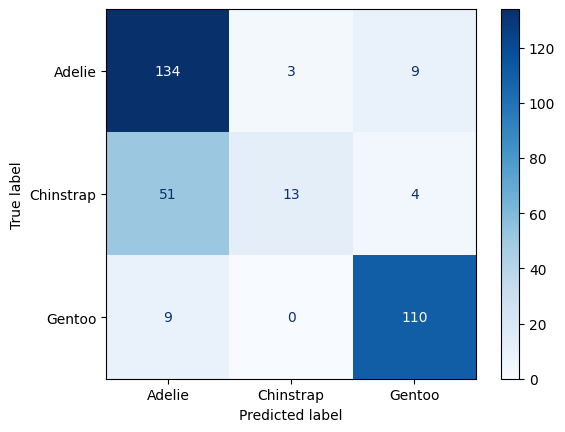

In [134]:
#K Nearest Neighbors
knn_pipeline2 = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier(n_neighbors=10))]
)

#Confusion Matrix
#Perform cross-validated predictions
y_pred_cv = cross_val_predict(knn_pipeline2, X, y, cv=5)

#Print confusion matrix and classification report
cm = confusion_matrix(y, y_pred_cv)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')

In [135]:
#Overall Accuracy
cv_accuracy = cross_val_score(knn_pipeline2, X, y, cv=5, scoring='accuracy').mean()
cv_accuracy

0.7720488466757124

In [136]:
#Precision, Recall, and F1 Score
report2 = classification_report(y, y_pred_cv, target_names=['Adelie', 'Chinstrap', 'Gentoo'])
print(report2)

              precision    recall  f1-score   support

      Adelie       0.69      0.92      0.79       146
   Chinstrap       0.81      0.19      0.31        68
      Gentoo       0.89      0.92      0.91       119

    accuracy                           0.77       333
   macro avg       0.80      0.68      0.67       333
weighted avg       0.79      0.77      0.73       333



In [137]:
#AUC Score

knn_pipeline2.fit(X, y)

# Binarize the true labels for multi-class AUC calculation
y_bin = label_binarize(y, classes=np.unique(y))

# Get predicted probabilities for each class
y_pred_prob = knn_pipeline2.predict_proba(X)

# Calculate and print the AUC for each species in one line per species
for i, species_name in enumerate(np.unique(y)):
    print(f"AUC score for {species_name}: {roc_auc_score(y_bin[:, i], y_pred_prob[:, i])}")


AUC score for Adelie: 0.918687275657461
AUC score for Chinstrap: 0.8973917869034407
AUC score for Gentoo: 0.9912824943061337


[[138   8   0]
 [  6  62   0]
 [  0   2 117]]


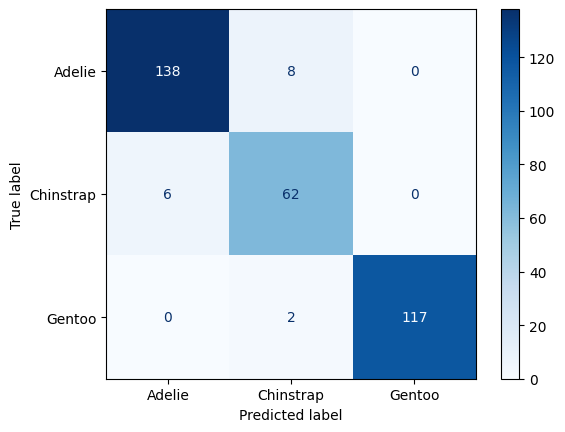

In [138]:
#Decision tree model
#2 buckets
tree_pipeline1 = Pipeline(
  [("preprocessing", ct),
  ("tree", DecisionTreeClassifier(max_depth=2))]
)

#Confusion Matrix
#Perform cross-validated predictions
y_pred_cv = cross_val_predict(tree_pipeline1, X, y, cv=5)

#Print confusion matrix and classification report
cm = confusion_matrix(y, y_pred_cv)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')

In [139]:
#Overall Accuracy
cv_accuracy = cross_val_score(tree_pipeline1, X, y, cv=5, scoring='accuracy').mean()
cv_accuracy

0.9518769787426503

In [140]:
#Precision, Recall, and F1 Score
report3 = classification_report(y, y_pred_cv, target_names=['Adelie', 'Chinstrap', 'Gentoo'])
print(report3)

              precision    recall  f1-score   support

      Adelie       0.96      0.95      0.95       146
   Chinstrap       0.86      0.91      0.89        68
      Gentoo       1.00      0.98      0.99       119

    accuracy                           0.95       333
   macro avg       0.94      0.95      0.94       333
weighted avg       0.95      0.95      0.95       333



In [141]:
#AUC Score

tree_pipeline1.fit(X, y)

# Binarize the true labels for multi-class AUC calculation
y_bin = label_binarize(y, classes=np.unique(y))

# Get predicted probabilities for each class
y_pred_prob = tree_pipeline1.predict_proba(X)

# Calculate and print the AUC for each species in one line per species
for i, species_name in enumerate(np.unique(y)):
    print(f"AUC score for {species_name}: {roc_auc_score(y_bin[:, i], y_pred_prob[:, i])}")

AUC score for Adelie: 0.9808438942202037
AUC score for Chinstrap: 0.9689234184239733
AUC score for Gentoo: 0.9987826906463521


[[138   7   1]
 [  6  62   0]
 [  0   2 117]]


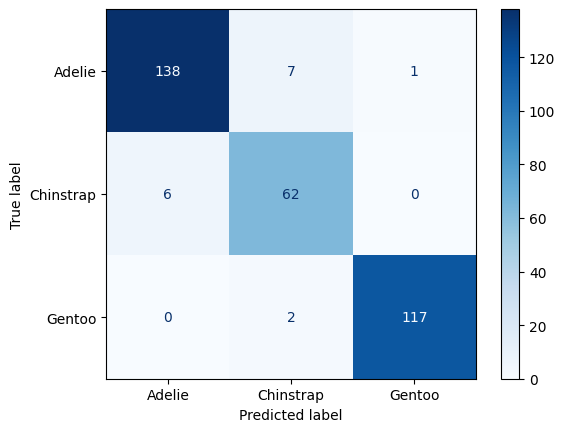

In [142]:
#Decision tree model
#3 buckets
tree_pipeline2 = Pipeline(
  [("preprocessing", ct),
  ("tree", DecisionTreeClassifier(max_depth=3))]
)

#Confusion Matrix
#Perform cross-validated predictions
y_pred_cv = cross_val_predict(tree_pipeline1, X, y, cv=5)

#Print confusion matrix and classification report
cm = confusion_matrix(y, y_pred_cv)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')

In [143]:
#Overall Accuracy
cv_accuracy = cross_val_score(tree_pipeline2, X, y, cv=5, scoring='accuracy').mean()
cv_accuracy

0.9608774310266849

In [144]:
#Precision, Recall, and F1 Score
report4 = classification_report(y, y_pred_cv, target_names=['Adelie', 'Chinstrap', 'Gentoo'])
print(report4)

              precision    recall  f1-score   support

      Adelie       0.96      0.95      0.95       146
   Chinstrap       0.87      0.91      0.89        68
      Gentoo       0.99      0.98      0.99       119

    accuracy                           0.95       333
   macro avg       0.94      0.95      0.94       333
weighted avg       0.95      0.95      0.95       333



In [145]:
#AUC Score
tree_pipeline2.fit(X, y)

# Binarize the true labels for multi-class AUC calculation
y_bin = label_binarize(y, classes=np.unique(y))

# Get predicted probabilities for each class
y_pred_prob = tree_pipeline2.predict_proba(X)

# Calculate and print the AUC for each species in one line per species
for i, species_name in enumerate(np.unique(y)):
    print(f"AUC score for {species_name}: {roc_auc_score(y_bin[:, i], y_pred_prob[:, i])}")

AUC score for Adelie: 0.9950919346568017
AUC score for Chinstrap: 0.9932574916759157
AUC score for Gentoo: 0.9999410979345009


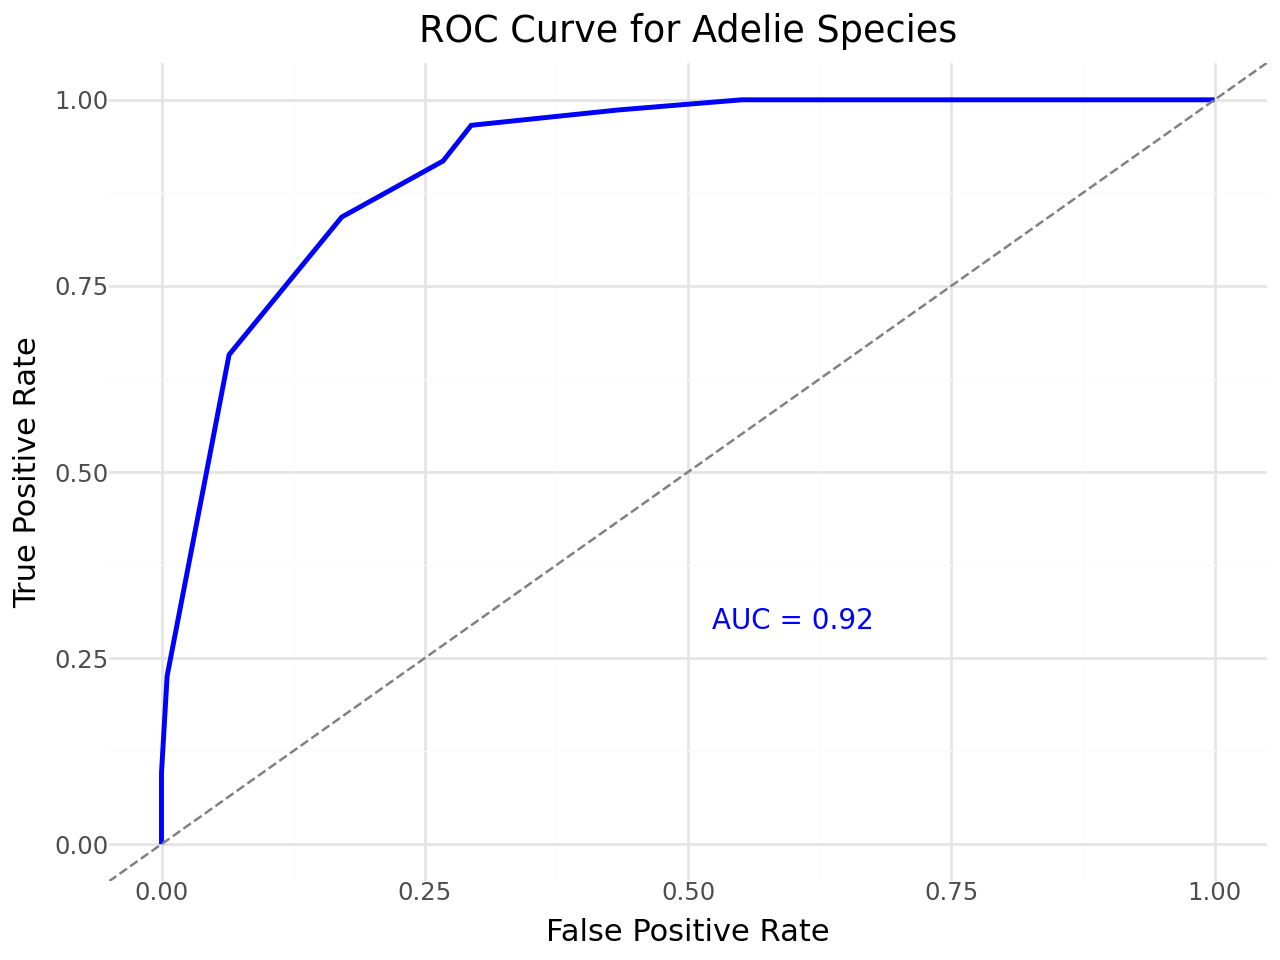

In [146]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
from plotnine import *

# Fit the model
knn_pipeline2.fit(X, y)

# Get predicted probabilities
y_pred_proba = knn_pipeline2.predict_proba(X)

# Select probabilities for 'Adelie' (assuming it's the first class in the output array)
adelie_probs = y_pred_proba[:, 0]  # Update index if necessary

# Create binary labels for 'Adelie' vs others
adelie_labels = (y == 'Adelie').astype(int)

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(adelie_labels, adelie_probs)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Prepare data for plotting
df_roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr})

# Create the ROC plot using plotnine
roc_plot = (ggplot(df_roc, aes(x='fpr', y='tpr')) +
            geom_line(size=1, color='blue') +
            geom_abline(linetype='dashed', color='gray') +
            labs(title='ROC Curve for Adelie Species',
                 x='False Positive Rate',
                 y='True Positive Rate') +
            annotate("text", x=0.6, y=0.3, label=f"AUC = {roc_auc:.2f}", size=10, color="blue") +
            theme_minimal())

roc_plot
